# **Quantum K-Means**

In [1]:
pip install qiskit-ibmq-provider

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install matlab

  Created wheel for matlab: filename=matlab-0.1-py3-none-any.whl size=1180 sha256=6f3feb961dd6f5a1288d05aa85864287831ad165f88923f7cd72e85e39990ea9
  Stored in directory: /home/jovyan/.cache/pip/wheels/9d/e3/ca/f9444a09793775674f6d6c3389b6192c72eff2503085389009
Successfully built matlab
Note: you may need to restart the kernel to use updated packages.


In [3]:
import matplotlib.pyplot as plot
import pandas as pand
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit
from qiskit import Aer, execute
from numpy import pi

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


[Text(0.5, 0, 'Feature 1'), Text(0, 0.5, 'Feature 2')]

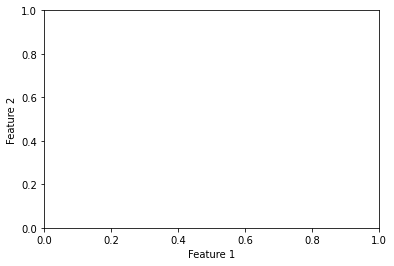

In [4]:
figure, axis = plot.subplots()
axis.set(xlabel='Feature 1', ylabel='Feature 2')

In [6]:
data_input = pand.read_csv('kmeans_input.csv',
    usecols=['Feature 1', 'Feature 2', 'Class'])

In [7]:
isRed = data_input['Class'] == 'Red'
isGreen = data_input['Class'] == 'Green'
isBlack = data_input['Class'] == 'Black'

In [8]:
# Filter data
redData = data_input[isRed].drop(['Class'], axis=1)
greenData = data_input[isGreen].drop(['Class'], axis=1)
blackData = data_input[isBlack].drop(['Class'], axis=1)

In [9]:
y_p = 0.141
x_p = -0.161

In [10]:
xgc = sum(redData['Feature 1']) / len(redData['Feature 1'])
xbc = sum(greenData['Feature 1']) / len(greenData['Feature 1'])
xkc = sum(blackData['Feature 1']) / len(blackData['Feature 1'])

In [11]:
# Finding the y-coords of the centroids
ygc = sum(redData['Feature 2']) / len(redData['Feature 2'])
ybc = sum(greenData['Feature 2']) / len(greenData['Feature 2'])
ykc = sum(blackData['Feature 2']) / len(blackData['Feature 2'])

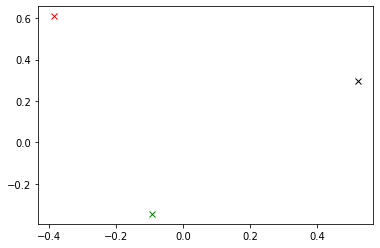

In [12]:
# Plotting the centroids
plot.plot(xgc, ygc, 'rx')
plot.plot(xbc, ybc, 'gx')
plot.plot(xkc, ykc, 'kx')

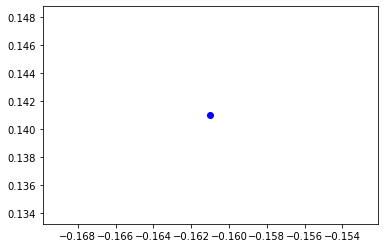

In [13]:
plot.plot(x_p, y_p, 'bo')

(-1.0, 1.0, -1.0, 1.0)

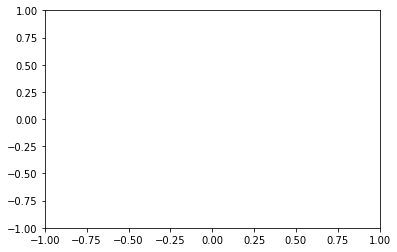

In [14]:
# Setting the axis ranges
plot.axis([-1, 1, -1, 1])

In [15]:
plot.show()

In [16]:
# Calculating theta and phi values
phi_list = [((x + 1) * pi / 2) for x in [x_p, xgc, xbc, xkc]]
theta_list = [((x + 1) * pi / 2) for x in [y_p, ygc, ybc, ykc]]

In [17]:
quantumregister = QuantumRegister(3, 'quantumregister')

In [18]:
classicregister = ClassicalRegister(1, 'classicregister')
quantum_circuit = QuantumCircuit(quantumregister, classicregister, name='qc')
backend = Aer.get_backend('qasm_simulator')
quantum_results_list = []

In [19]:
for i in range(1, 4):
    quantum_circuit.h(quantumregister[2])

   
    quantum_circuit.u3(theta_list[0], phi_list[0], 0, quantumregister[0])           
    quantum_circuit.u3(theta_list[i], phi_list[i], 0, quantumregister[1]) 

    quantum_circuit.cswap(quantumregister[2], quantumregister[0], quantumregister[1])
    quantum_circuit.h(quantumregister[2])

    quantum_circuit.measure(quantumregister[2], classicregister[0])

    quantum_circuit.reset(quantumregister)

    job = execute(quantum_circuit, backend=backend, shots=1024)
    result = job.result().get_counts(quantum_circuit)
    quantum_results_list.append(result['1'])

print(quantum_results_list)

/tmp/ipykernel_110/1224122024.py:5: DeprecationWarning: The QuantumCircuit.u3 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use QuantumCircuit.u instead, which acts identically. Alternatively, you can decompose u3 in terms of QuantumCircuit.p and QuantumCircuit.sx: u3(ϴ,φ,λ) = p(φ+π) sx p(ϴ+π) sx p(λ) (2 pulses on hardware).
  quantum_circuit.u3(theta_list[0], phi_list[0], 0, quantumregister[0])
/tmp/ipykernel_110/1224122024.py:6: DeprecationWarning: The QuantumCircuit.u3 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use QuantumCircuit.u instead, which acts identically. Alternatively, you can decompose u3 in terms of QuantumCircuit.p and QuantumCircuit.sx: u3(ϴ,φ,λ) = p(φ+π) sx p(ϴ+π) sx p(λ) (2 pulses on hardware).
  quantum_circuit.u3(theta_list[i], phi_list[i], 0, quantumregister[1])


[79, 64, 115]


/tmp/ipykernel_110/1224122024.py:5: DeprecationWarning: The QuantumCircuit.u3 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use QuantumCircuit.u instead, which acts identically. Alternatively, you can decompose u3 in terms of QuantumCircuit.p and QuantumCircuit.sx: u3(ϴ,φ,λ) = p(φ+π) sx p(ϴ+π) sx p(λ) (2 pulses on hardware).
  quantum_circuit.u3(theta_list[0], phi_list[0], 0, quantumregister[0])
/tmp/ipykernel_110/1224122024.py:6: DeprecationWarning: The QuantumCircuit.u3 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use QuantumCircuit.u instead, which acts identically. Alternatively, you can decompose u3 in terms of QuantumCircuit.p and QuantumCircuit.sx: u3(ϴ,φ,λ) = p(φ+π) sx p(ϴ+π) sx p(λ) (2 pulses on hardware).
  quantum_circuit.u3(theta_list[i], phi_list[i], 0, quantumregister[1])


In [20]:
class_list = ['Red', 'Green', 'Black']
quantum_p_class = class_list[quantum_results_list.index(min(quantum_results_list))]
distances_list = [((x_p - i[0])**2 + (y_p - i[1])**2)**0.5 for i in [(xgc, ygc), (xbc, ybc), (xkc, ykc)]]
classical_p_class = class_list[distances_list.index(min(distances_list))]

In [21]:
print("""using quantumdistance algorithm,
 the new data point is related to the""", quantum_p_class, 
 'class.\n')
print('Euclidean distances are listed: ', distances_list, '\n')
print("""based on euclidean distance calculations,
 the new data point is related to the""", classical_p_class, 
 'class.')

using quantumdistance algorithm,
 the new data point is related to the Green class.

Euclidean distances are listed:  [0.520285324797846, 0.4905204028376394, 0.7014755294377704] 

based on euclidean distance calculations,
 the new data point is related to the Green class.


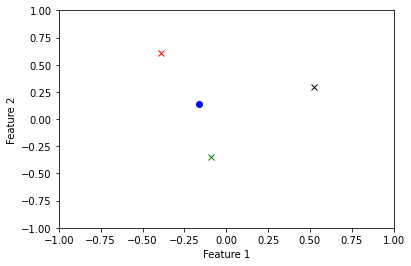

[69, 83, 126]
using quantumdistance algorithm,
 the new data point is related to the Red class.

Euclidean distances are listed:  [0.520285324797846, 0.4905204028376394, 0.7014755294377704] 

based on euclidean distance calculations,
 the new data point is related to the Green class.


/tmp/ipykernel_110/1288781009.py:66: DeprecationWarning: The QuantumCircuit.u3 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use QuantumCircuit.u instead, which acts identically. Alternatively, you can decompose u3 in terms of QuantumCircuit.p and QuantumCircuit.sx: u3(ϴ,φ,λ) = p(φ+π) sx p(ϴ+π) sx p(λ) (2 pulses on hardware).
  quantum_circuit.u3(theta_list[0], phi_list[0], 0, quantumregister[0])
/tmp/ipykernel_110/1288781009.py:67: DeprecationWarning: The QuantumCircuit.u3 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use QuantumCircuit.u instead, which acts identically. Alternatively, you can decompose u3 in terms of QuantumCircuit.p and QuantumCircuit.sx: u3(ϴ,φ,λ) = p(φ+π) sx p(ϴ+π) sx p(λ) (2 pulses on hardware).
  quantum_circuit.u3(theta_list[i], phi_list[i], 0, quantumregister[1])


In [22]:
figure, axis = plot.subplots()
axis.set(xlabel='Feature 1', ylabel='Feature 2')


data_input = pand.read_csv('kmeans_input.csv',
    usecols=['Feature 1', 'Feature 2', 'Class'])


isRed = data_input['Class'] == 'Red'
isGreen = data_input['Class'] == 'Green'
isBlack = data_input['Class'] == 'Black'

# Filter data
redData = data_input[isRed].drop(['Class'], axis=1)
greenData = data_input[isGreen].drop(['Class'], axis=1)
blackData = data_input[isBlack].drop(['Class'], axis=1)


y_p = 0.141
x_p = -0.161

xgc = sum(redData['Feature 1']) / len(redData['Feature 1'])
xbc = sum(greenData['Feature 1']) / len(greenData['Feature 1'])
xkc = sum(blackData['Feature 1']) / len(blackData['Feature 1'])

# Finding the y-coords of the centroids
ygc = sum(redData['Feature 2']) / len(redData['Feature 2'])
ybc = sum(greenData['Feature 2']) / len(greenData['Feature 2'])
ykc = sum(blackData['Feature 2']) / len(blackData['Feature 2'])

# Plotting the centroids
plot.plot(xgc, ygc, 'rx')
plot.plot(xbc, ybc, 'gx')
plot.plot(xkc, ykc, 'kx')


plot.plot(x_p, y_p, 'bo')

# Setting the axis ranges
plot.axis([-1, 1, -1, 1])

plot.show()

# Calculating theta and phi values
phi_list = [((x + 1) * pi / 2) for x in [x_p, xgc, xbc, xkc]]
theta_list = [((x + 1) * pi / 2) for x in [y_p, ygc, ybc, ykc]]

quantumregister = QuantumRegister(3, 'quantumregister')


classicregister = ClassicalRegister(1, 'classicregister')

quantum_circuit = QuantumCircuit(quantumregister, classicregister, name='qc')


backend = Aer.get_backend('qasm_simulator')


quantum_results_list = []


for i in range(1, 4):
    quantum_circuit.h(quantumregister[2])

   
    quantum_circuit.u3(theta_list[0], phi_list[0], 0, quantumregister[0])           
    quantum_circuit.u3(theta_list[i], phi_list[i], 0, quantumregister[1]) 

    quantum_circuit.cswap(quantumregister[2], quantumregister[0], quantumregister[1])
    quantum_circuit.h(quantumregister[2])

    quantum_circuit.measure(quantumregister[2], classicregister[0])

    quantum_circuit.reset(quantumregister)

    job = execute(quantum_circuit, backend=backend, shots=1024)
    result = job.result().get_counts(quantum_circuit)
    quantum_results_list.append(result['1'])

print(quantum_results_list)



class_list = ['Red', 'Green', 'Black']


quantum_p_class = class_list[quantum_results_list.index(min(quantum_results_list))]


distances_list = [((x_p - i[0])**2 + (y_p - i[1])**2)**0.5 for i in [(xgc, ygc), (xbc, ybc), (xkc, ykc)]]
classical_p_class = class_list[distances_list.index(min(distances_list))]

print("""using quantumdistance algorithm,
 the new data point is related to the""", quantum_p_class, 
 'class.\n')
print('Euclidean distances are listed: ', distances_list, '\n')
print("""based on euclidean distance calculations,
 the new data point is related to the""", classical_p_class, 
 'class.')